In [1]:
#Descenso del Gradiente
#Para optimizar funciones no-convexas
#Usamos la derivada de la funcion para encontrar la pendiente
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

In [3]:
#Optimizar una funcion, siempre que sea derivable
#Esta funcoon es cualquiera, no corresponde a ningun modelo
#Funcion anonima
#th=z

#Esta es la funcion que queremos optimizar
#func= lambda th:np.sin(1/2*x**2 -1/4*y**2+3)*np.cos(2*x+1-np.e**y)

#Pero como mi funcion esta en funcion de th que es un vector de entrada, 
#entonces x=th[0] & y=th[1], reescribimos la funcion asi
func= lambda th:np.sin(1/2*th[0]**2 -1/4*th[1]**2+3)*np.cos(2*th[0]+1-np.e**th[1])

In [6]:
#Prueba de ejecucion
func([5,3])

-0.5956138973318122

In [7]:
#generamos la visualizacion desde arriba

#Generamos un vector de valores para X, con una resolucion res=100 valores
res=100
_X = np.linspace (-2,2, res)
_Y = np.linspace (-2,2, res)
print (_X, _Y)

[-2.         -1.95959596 -1.91919192 -1.87878788 -1.83838384 -1.7979798
 -1.75757576 -1.71717172 -1.67676768 -1.63636364 -1.5959596  -1.55555556
 -1.51515152 -1.47474747 -1.43434343 -1.39393939 -1.35353535 -1.31313131
 -1.27272727 -1.23232323 -1.19191919 -1.15151515 -1.11111111 -1.07070707
 -1.03030303 -0.98989899 -0.94949495 -0.90909091 -0.86868687 -0.82828283
 -0.78787879 -0.74747475 -0.70707071 -0.66666667 -0.62626263 -0.58585859
 -0.54545455 -0.50505051 -0.46464646 -0.42424242 -0.38383838 -0.34343434
 -0.3030303  -0.26262626 -0.22222222 -0.18181818 -0.14141414 -0.1010101
 -0.06060606 -0.02020202  0.02020202  0.06060606  0.1010101   0.14141414
  0.18181818  0.22222222  0.26262626  0.3030303   0.34343434  0.38383838
  0.42424242  0.46464646  0.50505051  0.54545455  0.58585859  0.62626263
  0.66666667  0.70707071  0.74747475  0.78787879  0.82828283  0.86868687
  0.90909091  0.94949495  0.98989899  1.03030303  1.07070707  1.11111111
  1.15151515  1.19191919  1.23232323  1.27272727  1.3

In [10]:
#Ahora generamos una matriz para guardar las combinaciones de X & Y, es decir una matriz de 100 x 100
_Z = np.zeros((res,res))

#Iterar los elementos de X & Y

for ix, x in enumerate(_X):
    for iy, y in enumerate(_Y):
        _Z[iy, ix]= func([x,y])

#En _Z tenemos los valores de la combinacion de X & Y usando la funcion Z[y,x] = func(X, Y)
print (_Z)

[[ 0.75678768  0.69949249  0.63520381 ...  0.00601758 -0.05013846
  -0.1147978 ]
 [ 0.78233319  0.72763874  0.66546524 ...  0.0100609  -0.04806718
  -0.11435375]
 [ 0.80611957  0.75410427  0.69414667 ...  0.01456705 -0.04540738
  -0.11319675]
 ...
 [ 0.74539135  0.72025173  0.6843787  ...  0.27770918  0.24181329
   0.19526019]
 [ 0.61239218  0.60628261  0.5884932  ...  0.42781714  0.41611394
   0.39256434]
 [ 0.43138509  0.44549641  0.44762885 ...  0.53501224  0.54960755
   0.55243366]]


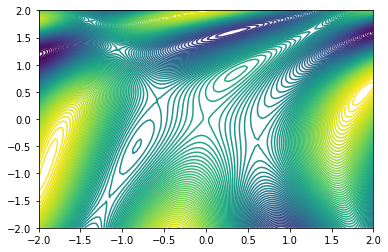

In [16]:
#Visualizando
#Para obtener la ayuda aqui escribe
plt.contour?
plt.contour(_X,_Y,_Z, 100)
plt.show()

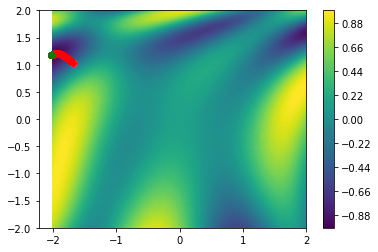

In [54]:
#Visualizasndo una version mas solida y con mas anillos
plt.contourf(_X,_Y,_Z,100)

#Esto nos permitira ver una leyenda con la explicacion de los colores y la altura
#El color amarillo significa una mayor altura
#El color mas oscuro una menor altura
plt.colorbar()

#Generaremos un punto aleatorio sobre esta superficie
#Para que aparezca en el grafico anterior aplicamos esta formula
theta= np.random.rand(2)*4-2 #yo no estoy seguro de aplicar la operacion: *4-2

# "o" que se vea el punto
# c="white" en color rojo
plt.plot(theta[0], theta[1], "o", c="white")


# Con la derivada parcial, tienes la pendiente para cada uno de los ejes o variables de tu funcion

#Definimos el incremento
h=0.001

#Creamos el vector de gradientes
grad= np.zeros(2)

#El algoritmo de gradient descent es iterativo por lo tanto repetiremos n veces 
n =10000

for _ in range (n):
    for it, th in enumerate(theta):
        #Creamos una copia porque manipularemos
        _T = np.copy(theta)

        #Le aplicamos un pequenio incremento a los valores aleatorios
        _T[it] = _T[it] + h

        #Calculamos la derivada
        deriv = (func(_T) - func(theta))/h

        #gradiente
        grad[it] = deriv

    #el learning rate que es un hiper parametro (que debe ser ajustado por el data scientist)
    lr = 0.0001
    #el nuevo punto (q nace a partir del aleatorio) es ahora el resultado de
    theta = theta - lr * grad
    
    #Entonces el punto theta aplicado en la funcion tendria que estar ubicandose en las partes mas oscuras
    #print (func(theta))
    if (_ % 50 == 0):
        plt.plot(theta[0], theta[1], "o", c="red")

#El punto final pintamos de verde
plt.plot(theta[0], theta[1], "o", c="green")
plt.show()

#Ejecuta varias veces y veras que el punto se mueve hacia las zonas oscuras

In [ ]:
#Esta es una alternativa al MCO = Minimo de Cuadrados Ordinarios del AI Notebook 1
#En el MCO se usa una ecuacion, en cambio aqui se usa un algoritmo de aproximacion en cada iteracion

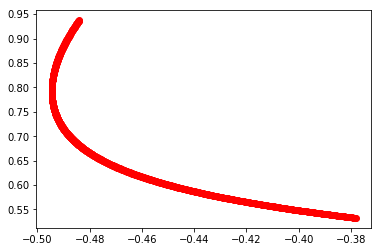